In [16]:
library(tidyverse)
library(scales)

In [2]:
#csv files are in GitHub Repo, here, use raw links to access data
players<-read_csv("https://raw.githubusercontent.com/alr10/dsci100-group-project/main/players.csv")
sessions<-read_csv("https://raw.githubusercontent.com/alr10/dsci100-group-project/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Variables Summary Tables code
players_variables<- tibble(
    variable = c("experience", "subscribe", "hashedEmail", "played_hours",
               "name", "gender", "Age"),
    
    type = c("chr", "lgl", "chr", "dbl", "chr", "chr", "dbl"),
    
    description = c("User experience level",
                    "Subscription",
                    "Hashed email identifier",
                    "Hours played",
                    "Username",
                    "Gender",
                    "Age in years"))

sessions_variables<- tibble(
        variable = c("hashedEmail",	"start_time", "end_time", "original_start_time", "original_end_time"),

        type = c( "chr", "chr", "chr", "dbl", "dbl"),

        description = c("Hashed email identifier",
                        "Session Start time in dd/mm/yyyy, 24h time",
                        "Session End time in dd/mm/yyyy, 24h time",
                        "Original Start time of session as Unix timestamp in milliseconds",
                        "Original End time of session as Unix timestamp in milliseconds"))
         

In [4]:
#Summary table for numeric variables (mean, max, min)
players_st_sum<- players|>
  summarise(across(where(is.numeric), list(
    mean = ~mean(.x, na.rm = TRUE),
    max  = ~max(.x, na.rm = TRUE),
    min  = ~min(.x, na.rm = TRUE)
  ))) 
sessions_st_sum<- sessions|>
 summarise(across(where(is.numeric), list(
    mean = ~mean(.x, na.rm = TRUE),
    max  = ~max(.x, na.rm = TRUE),
    min  = ~min(.x, na.rm = TRUE)
  )))

In [5]:
#Summary table for categorical variables
players_var_sum<- players|>
    select(experience, subscribe, gender)|>
    mutate(across(everything(), as.character))|>
    pivot_longer(everything(), 
                 names_to = "variable",
                 values_to = "value")|>
    group_by(variable, value)|>
    summarise(count = n(), .groups = "drop")  

## 1. Data Description

__General Overview__

players.csv: A list of all unique players, including data about each player.
>Total number of observations (rows) - 196

>Total number of variables (columns) - 7

sessions.csv: A list of individual play sessions by each player, including data about the session.
>Total number of observations (rows) - 1535

>Total number of variables (columns) - 5

__Variable Summary Tables (players - sessions):__

In [6]:
players_variables
sessions_variables 

variable,type,description
<chr>,<chr>,<chr>
experience,chr,User experience level
subscribe,lgl,Subscription
hashedEmail,chr,Hashed email identifier
played_hours,dbl,Hours played
name,chr,Username
gender,chr,Gender
Age,dbl,Age in years


variable,type,description
<chr>,<chr>,<chr>
hashedEmail,chr,Hashed email identifier
start_time,chr,"Session Start time in dd/mm/yyyy, 24h time"
end_time,chr,"Session End time in dd/mm/yyyy, 24h time"
original_start_time,dbl,Original Start time of session as Unix timestamp in milliseconds
original_end_time,dbl,Original End time of session as Unix timestamp in milliseconds


__Summary Statistics (numeric):__

In [7]:
players_st_sum
sessions_st_sum

played_hours_mean,played_hours_max,played_hours_min,Age_mean,Age_max,Age_min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,223.1,0,21.13918,58,9


original_start_time_mean,original_start_time_max,original_start_time_min,original_end_time_mean,original_end_time_max,original_end_time_min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.72733e+12,1.7124e+12,1.719196e+12,1.72734e+12,1.7124e+12


__Summary Variables (Categorical):__
>Session data categorical variables have no applicable counts to summarize

In [8]:
players_var_sum

variable,value,count
<chr>,<chr>,<int>
experience,Amateur,63
experience,Beginner,35
experience,Pro,14
experience,Regular,36
experience,Veteran,48
gender,Agender,2
gender,Female,37
gender,Male,124
gender,Non-binary,15


__How the data was collected__
- Players' actions are recorded as they navigate through the world. (Minecraft behavioral data)
-  Collected over 10,000 hours of  over ten thousand multiplayer Minecraft gameplay
- The project records spoken interactions between players from the player's microphone.
- The "experience" column in the players.csv file was collected on self-declared basis as users signed up

__Potential Issues with the Data__
> Sampling bias:
- Age range implications - parental consent for players under 13, "The parent can revoke consent any time"
-  Geographic ties - individuals who respond are likely UBC students or whomever they have advertised the study to

>Non-response bias: 
- Access to the study - Individuals who may never get the access link to Plaicraft/never discover the study; implies a higher range of players in the university age range

>Other:
- Ability to delete recorded data- although a necessary ethical option, you can delete some of your data as to not be used in the study, "provide us with session ID (found in the email or SMS with your access link) of the game session you would like us to delete. Alternatively, email support@plaicraft.ai for assistance."

## 2. Questions

__Broad Question__
> Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

__Specific Question__
> Can the mean hours played predict a subscription (subscribe = TRUE) in the players.csv dataset? AKA, do players who spend more hours playing the game have a higher probability of subscribing?

__>Notes__
 - The players dataset contains the hour of MC played and subscription (TRUE/FALSE)
 - allows me to wrangle/calculate mean hours played and predict if a higher or equal to the mean would result in a subscription
- Are hours played an accurate predictor of subscriptions?

## 3. Exploratory Data Analysis and Visualization

In [9]:
#loading datasets
#datasets are already tidy
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


__Mean Value for Quantitative variables in players.csv__

In [10]:
players_mean_sum<- players|>
  summarise(across(where(is.numeric), list(
    mean = ~mean(.x, na.rm = TRUE))))
round(players_mean_sum, 2)

played_hours_mean,Age_mean
<dbl>,<dbl>
5.85,21.14


__Mean Value for Quantitative variables in players.csv who reported non-0 Hours played__
> played hours mean = 10.32 (used in visualizations)

In [11]:
players_mean_sum_vis<- players|>
    filter(played_hours != 0)|>
  summarise(across(where(is.numeric), list(
    mean = ~mean(.x, na.rm = TRUE))))
players_mean_sum_vis

played_hours_mean,Age_mean
<dbl>,<dbl>
10.32252,21.30275


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


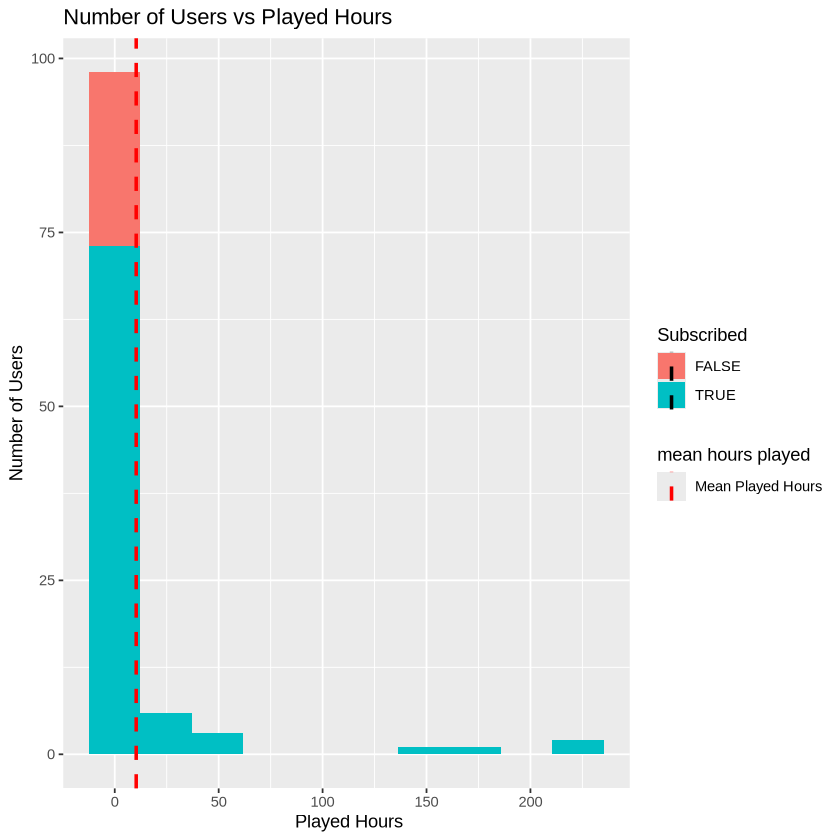

In [12]:
#mutate dataset to use for visualization
players_data_vis<-players|>
        filter(played_hours != 0)|>
    mutate(mean_age = mean(Age, na.rm = TRUE),
           mean_hours = mean(played_hours, na.rm = TRUE))

players_vis_1<-players_data_vis|>
    ggplot(aes(x = played_hours, fill = subscribe))+
        geom_histogram(bins = 10)+
        geom_vline(aes(xintercept = 10.32, color = "Mean Played Hours"), 
        linetype = "dashed", size = 1, show.legend = TRUE) +
        scale_color_manual(values = c("Mean Played Hours" = "red")) +
        labs( x = " Played Hours", y = "Number of Users", fill = "Subscribed", color = "mean hours played",
            title= "Number of Users vs Played Hours")
players_vis_1

__Insights for vis 1:__
Here, it shows the counts of users against their hours played. However, this histogram is not very readable, but it provides a good idea of the distribution of hours played between users. (That being the vast majority played less than ~50 hours, with some most likely outliers, residing in hours played above 100.)

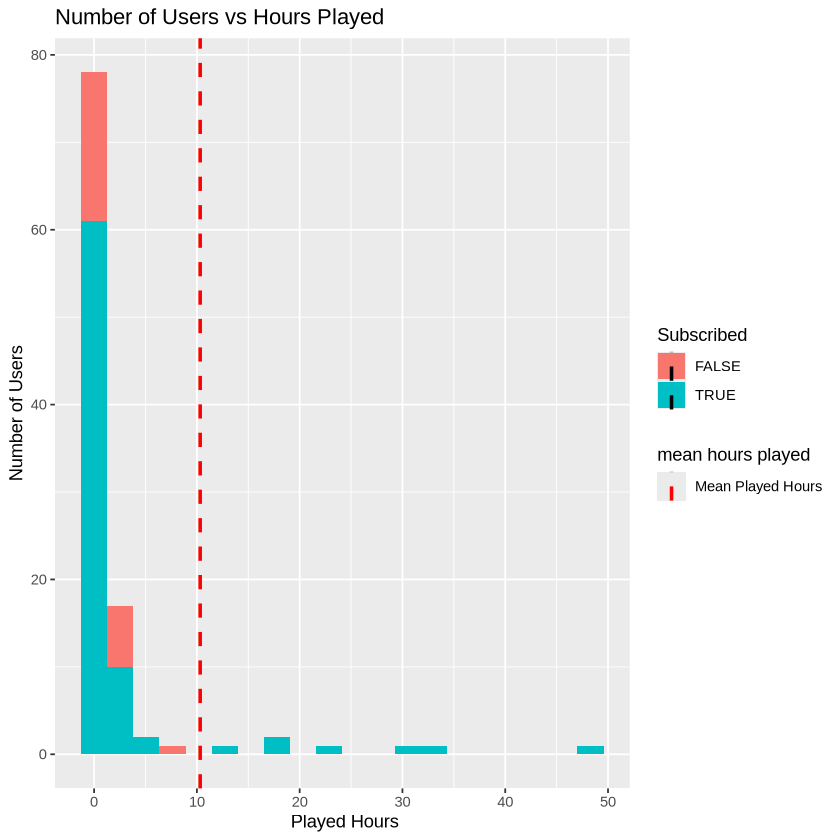

In [13]:
players_data_vis_2<-players|>
        filter(played_hours != 0, played_hours <=50)|>
    mutate(mean_age = mean(Age, na.rm = TRUE),
           mean_hours = mean(played_hours, na.rm = TRUE))

players_vis_2<-players_data_vis_2|>
    ggplot(aes(x = played_hours, fill = subscribe))+
        geom_histogram(bins = 20)+
        geom_vline(aes(xintercept = 10.32, color = "Mean Played Hours"), 
        linetype = "dashed", size = 1, show.legend = TRUE) +
        scale_color_manual(values = c("Mean Played Hours" = "red")) +
        labs( x = " Played Hours", y = "Number of Users", fill = "Subscribed", color = "mean hours played",
            title = "Number of Users vs Hours Played")
players_vis_2

__Insights for vis 2:__
Here, we break down the dense area of data from the first visualization. We can more clearly see the number of users vs hours played, and an approximate ratio of subscribers. In this histogram, we get a rough idea of the proportions of subscribed/not subscribed for the majority of the player base and where the most counts of played hours lie less than 10 hours.

Warning message:
“Removed 70 rows containing missing values or values outside the scale range
(`geom_bar()`).”


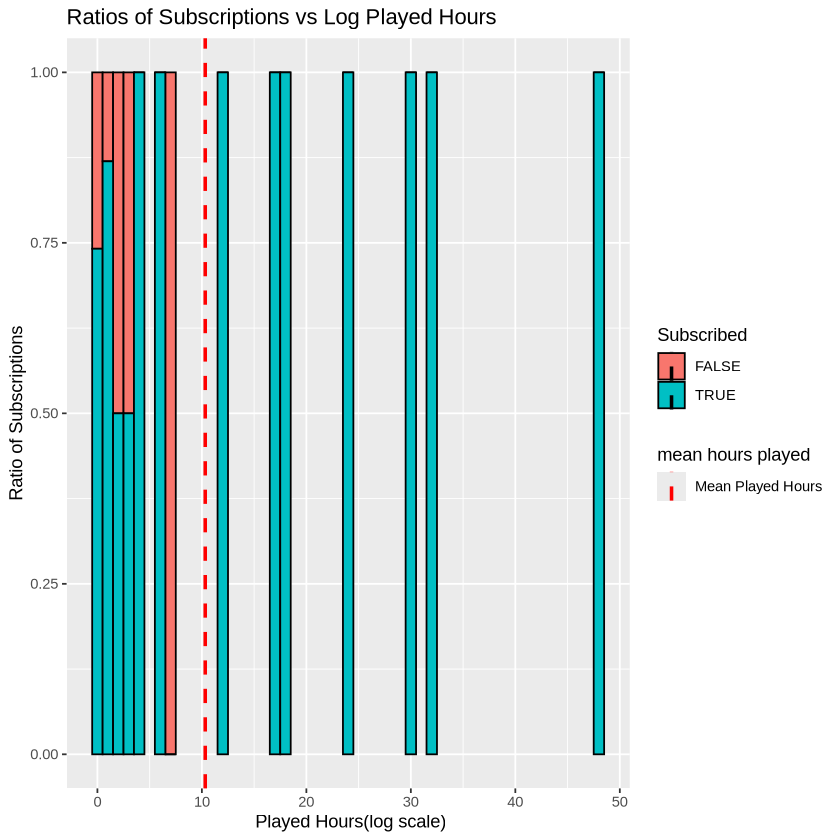

In [14]:
players_vis_3<-players_data_vis_2|>
    ggplot(aes(x = played_hours, fill = subscribe))+
        geom_histogram(position = "fill", binwidth = 1, color = "black")+
        geom_vline(aes(xintercept = 10.32, color = "Mean Played Hours"), 
        linetype = "dashed", size = 1, show.legend = TRUE) +
        scale_color_manual(values = c("Mean Played Hours" = "red")) +
        labs( x = " Played Hours(log scale)",
             y = "Ratio of Subscriptions",
             fill = "Subscribed",
             color = "mean hours played",
             title = "Ratios of Subscriptions vs Log Played Hours")
players_vis_3

__Insights for vis 3__
This visualization shows the exact ratios of subscribed to non-subscribed players per log played hours. Here we can better see the ratios of subscriptions but it still isn't very clear and most of our points of interest are from what looks to be 0-20 hours.

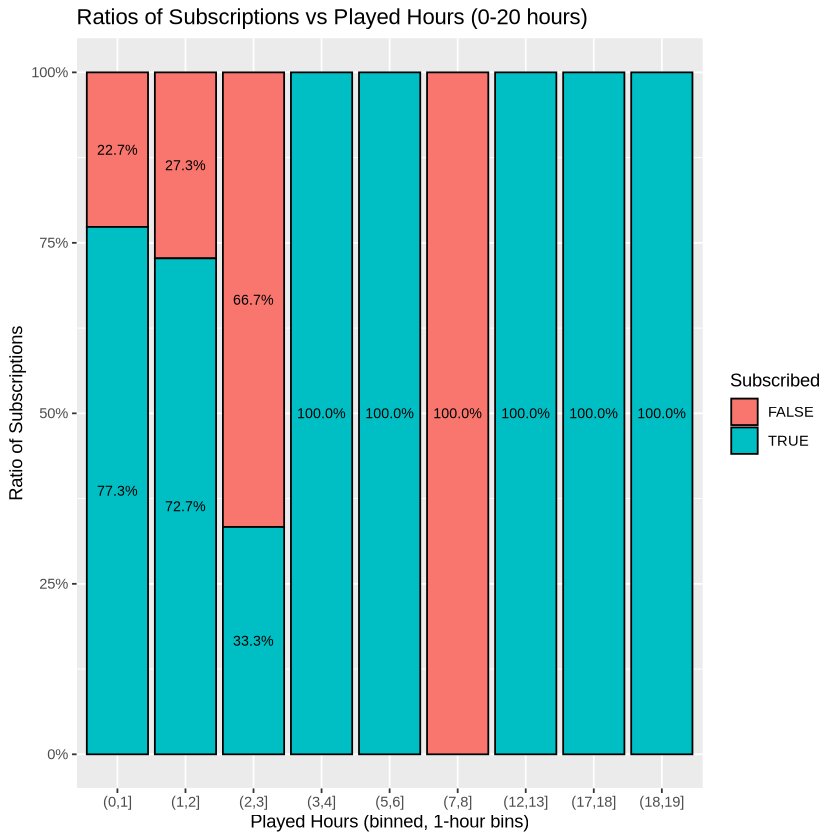

In [17]:
players_binned <- players_data_vis |>
  filter(played_hours > 0, played_hours <= 20)|>
  mutate(bin = cut(played_hours, breaks = seq(0, 20, by = 1))) |>
  group_by(bin, subscribe)|>
  summarise(count = n(), .groups = "drop")|>
  group_by(bin)|>
  mutate(ratio = count / sum(count))|>
  ungroup()

players_vis_4<-ggplot(players_binned, aes(x = bin, y = ratio, fill = subscribe)) +
    geom_col(color = "black") +
    geom_text(aes(label = percent(ratio)), position = position_stack(vjust = 0.5), size = 3) +
  labs(x = "Played Hours (binned, 1-hour bins)",
       y = "Ratio of Subscriptions",
       fill = "Subscribed",
       title = "Ratios of Subscriptions vs Played Hours (0-20 hours)") +
  scale_y_continuous(labels = percent_format())
players_vis_4

__Insights for vis 4:__
Here, we can properly discern the proportions of subscriptions to the newsletter based on the number of hours spent playing the game for the most dense region of the original histogram (around 10 hours or less; 10-20 included for good measure). From the mean, which we determined to be 10.32 hours, we can see that above 10.32 it is almost certain a subscription occurs, and below 10.32 we can see the proportions split as labelled.

## 4. Methods and Plan

>My specific Question: Can the mean hours played predict a subscription (subscribe = TRUE) in the players.csv dataset? AKA, do players who spend more hours playing the game have a higher probability of subscribing? 

__Methods__


To address this question, I plan to:

a) Find the mean time for non-zero hours played reported 

b) Look at the distribution of hours vs subscriptions in a histogram visualization to see areas of interest

c) Locate the most count-dense area of hours and analyze the ratios of sub/non-sub participants


__Explanation and why the method is appropriate:__

Putting a number to the hours spent as an indicator will be invaluable in answering how player behaviours can predict subscriptions. Therefore, to break down the data to pinpoint areas of interest, the fastest way to address the participants' behaviours is to find the mean for a set of data, in this case, hours played. I filtered out 0-hour reports as they are not useful to this exploration/may be outliers (if hours played were removed by request/ forgotten to record). 
    
Then I looked for the hours where most players reported their times to consider the largest number of people. This large number of people can be considered the majority or general public as we can ignore reports of extremely high hours due to underlying variables such as experience, age, and anything to do with their ability/inability to play the game, because we don't want to look at hyperspecific cases we want to look at the most accurate depiction of the whole dataset.

After, I found the ratios of sub/non-sub participants once we find a "sweet spot," essentially the hours played that guarantees a subscription with a % level or certainty a subscription will happen (the predictive analysis to further explore), you will be able to gauge for the majority of players that: if they play x amount of hours then they will subscribe to our newsletter.

__Which dataset did I use and why:__ I will use the players.csv data set because that is where hours played and the subscription status are found. 

__Assumptions:__

- assumes the hours reported represent the public wholistically or as intended (perhaps specific to a region)
- assumes the data's age, gender, and experience level are reflective of the general public
- players reported hours are true and not over/under the true hours played
- player experience is the same/similar/reproducible within participants, aka their game loaded within similar and reasonable levels of bitrate, lag, and visuals, as compromising user experiences can lead to less time played on the game

__Limitations and Weaknesses:__

- subscription behaviour is likely influenced by many factors like age, experience, personality, etc.
- Using only mean hours played oversimplifies behaviour, which may lower accuracy
- filtering out players with a recorded 0 hours assumes they are irrelevant or errors but may be players who signed up just as the data was collected (no chance to play before) or whose system didn't track their hours
- The dataset is right-skewed and may be distorted by outliers
- Binned hours simplify visualization but reduce precision
- The dataset may not represent the general public/population

__How are you going to compare and select the model?__
To evaluate whether hours played can predict a subscription, I would build a classification model with subscribe (true/false) as the outcome. The model will be a logistic regression, because the outcome is binary and easily answers our goal of predicting the probability of subscription based on hours played. 

I will compare a prediction model using only played_hours as the predictor and a comparison model using variables like age, experience, or gender to test against their accuracy. 

__How are you going to process the data to apply the model?__

1. filter and clean the data
- Remove players with played_hours == 0 because they provide no behaviour signal
- remove missing values in subscribe or played_hours
2. Split the Data - as done typically in tutorials
- Training: 70%
- Testing: 30%
3. Cross Validation
- 5-fold cross-validation to evaluate performance
5. Fit the final model on all the training data and predict on training set for diagnostics
6. Evaluate on the test set using the final trained model
  - predict probabilities on the test
  - add the actual subscribe column from your test set so each row has the true value (subscribe), and predicted probability for TRUE and FALSE
- convert probabilities into predicted classes
  
  